In [1]:
#MNIST contains 70,000 grayscale images of handwritten digits (0–9).
#Training Set: 60,000 images
#Test Set: 10,000 images
#Each image is 28x28 pixels, flattened into a 784-dimensional vector.
#We need to flatten the 2D array because fully connected dense layers expect input in the form of a vector not in the form of 2D array.
#Each image in the MNIST dataset is associated with a corresponding label, representing the digit it depicts.There are 10 different classes.

In [8]:
#Import the necessary Libraries
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
from tensorflow.keras.datasets import mnist #loading the MNIST dataset
from tensorflow.keras.models import Sequential #A linear stack of layers to build the model
from tensorflow.keras.layers import Dense, Flatten #Dense: A fully connected layer.
#Flatten: A layer to convert 2D input (28x28 images) into 1D.
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout



In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #loading the dataset(X is the image and y is the label)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize the data
#We normalize the MNIST data (scaling pixel values to [0, 1]) to make the model training faster and more stable. Normalization ensures that the input values are on a similar scale, reducing the risk of exploding/vanishing gradients and improving the performance of gradient-based optimizers.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [6]:
# Reshape the data for CNN input
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))  # Reshape to (num_samples, height, width, channels)
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) #MNIST images are grayscale, so the channel dimension is 1. This format ensures the model processes the data correctly.

In [9]:
#Build the CNN Model
model=Sequential() #creating the sequential model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #IT ADDS A 2DCONVOLUTIONAL LAYER TO SEQUENTIAL MODEL,there would be 32 filters of size(3*3) capturing the specific features and patterns...This layer is like a feature extractor, learning to recognize specific patterns in the input images.
model.add(MaxPooling2D(pool_size=(2, 2))) #Max Pooling is a technique to downsample the input representation while preserving the most important features.
model.add(Conv2D(64, (3, 3), activation='relu'))  # Second convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Second pooling layer
model.add(Flatten()) #Flatten the output
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5)) #Dropout layer to prevent overfitting and not allowing a neuron to become dependable on a single neuron
model.add(Dense(10, activation='softmax'))  # Output layer..Softmax is the ideal activation function for the output layer of a neural network when the goal is to assign probabilities to multiple classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Compiling the Model which involves defining the optimizer, the loss function and the chosing the metrics..
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)#In the context of neural networks, an epoch refers to one complete pass through the entire training dataset


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8553 - loss: 0.4652 - val_accuracy: 0.9793 - val_loss: 0.0727
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9726 - loss: 0.0938 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9811 - loss: 0.0629 - val_accuracy: 0.9858 - val_loss: 0.0488
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9847 - loss: 0.0510 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9904 - val_loss: 0.0379


In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) #test_loss: This is the average loss value over the entire test set.
#test_acc: This is the average accuracy of the model on the test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9880 - loss: 0.0348


In [13]:
#We print the accuracy score
print(f"The accuracy is :{test_acc}")

The accuracy is :0.9902999997138977


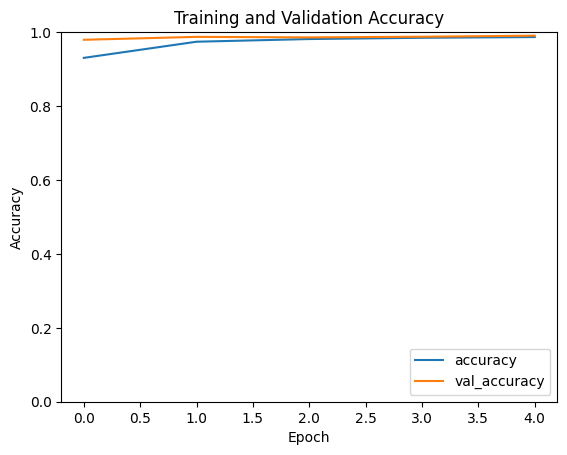

In [14]:
# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()